In [8]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

def rmhc(universe_size, num_sets, density, max_iterations=1000, early_stop_iterations=100, restart_interval=200, temperature=1.0):
    """Run Randomized Hill Climbing (RMHC) for the Set Cover Problem."""
    
    # Generate SETS and COSTS
    SETS = np.random.random((num_sets, universe_size)) < density
    for s in range(universe_size):
        if not np.any(SETS[:, s]):
            SETS[np.random.randint(num_sets), s] = True
    COSTS = np.power(SETS.sum(axis=1), 1.1)

    # Initialize solution
    current_solution = np.random.random(num_sets) < 0.5
    current_cost = COSTS[current_solution].sum()
    history = [current_cost]
    best_solution = current_solution.copy()
    best_cost = current_cost

    # Early stopping variables
    no_improvement_count = 0

    # RMHC loop
    for iteration in tqdm(range(max_iterations)):
        # Random restart
        if iteration > 0 and iteration % restart_interval == 0:
            current_solution = np.random.random(num_sets) < 0.5
            current_cost = COSTS[current_solution].sum()
            no_improvement_count = 0  # Reset counter

        neighbor = current_solution.copy()

        # Randomly flip a set with 40% probability
        if np.random.rand() < 0.4:
            i = np.random.randint(0, num_sets)
            neighbor[i] = not neighbor[i]

        neighbor_cost = COSTS[neighbor].sum()
        history.append(neighbor_cost)

        # Accept the neighbor if it's valid and has a lower cost
        if np.all(np.any(SETS[neighbor], axis=0)):  # Valid solution check
            if neighbor_cost < current_cost:
                current_solution = neighbor
                current_cost = neighbor_cost
                no_improvement_count = 0  # Reset counter

                # Update best solution
                if current_cost < best_cost:
                    best_solution = current_solution.copy()
                    best_cost = current_cost
            else:
                # Accept worse solution with a probability (Simulated Annealing-like)
                delta_cost = neighbor_cost - current_cost
                if np.random.rand() < np.exp(-delta_cost / temperature):
                    current_solution = neighbor
                    current_cost = neighbor_cost
        else:
            no_improvement_count += 1

        # Early termination if no improvement for a while
        if no_improvement_count >= early_stop_iterations:
            print(f"Early termination at iteration {iteration} (no improvement for {early_stop_iterations} iterations).")
            break

    # Output results
    print(f"Best Cost: {best_cost}")
    print(f"Index of Best Cost in History: {history.index(best_cost)}")

    # Plot results
    plt.figure(figsize=(14, 8))
    plt.title(f"RMHC for Set Cover Problem\nUNIVERSE_SIZE={universe_size}, NUM_SETS={num_sets}, DENSITY={density}")
    plt.xlabel("Iteration")
    plt.ylabel("Cost")
    plt.plot(range(len(history)), history, color="blue", label="Cost History")
    plt.plot(range(len(history)), np.minimum.accumulate(history), color="red", label="Best Cost")
    plt.legend()
    plt.show()


Run for each of the configurations


Running RMHC for configuration: {'universe_size': 100, 'num_sets': 10, 'density': 0.2}


 10%|███▊                                  | 99/1000 [00:00<00:00, 45326.50it/s]

Early termination at iteration 99 (no improvement for 100 iterations).
Best Cost: 159.23215735906325
Index of Best Cost in History: 0


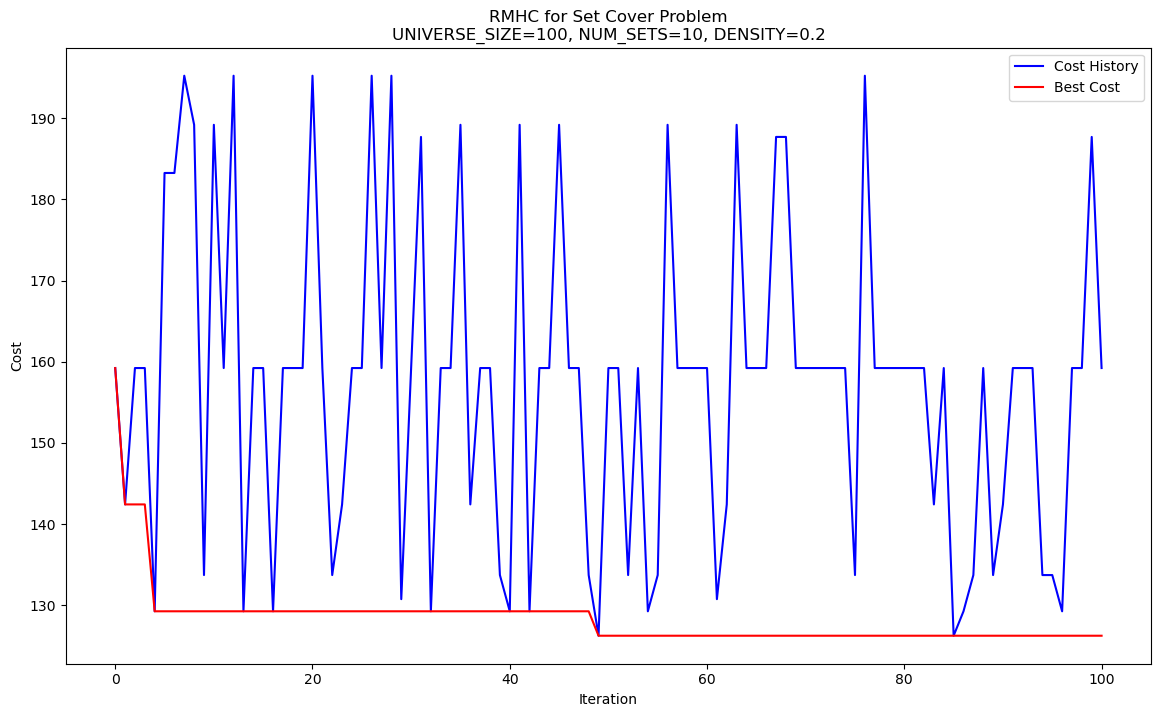


Running RMHC for configuration: {'universe_size': 1000, 'num_sets': 100, 'density': 0.2}


100%|████████████████████████████████████| 1000/1000 [00:00<00:00, 30665.27it/s]

Best Cost: 8149.806205496709
Index of Best Cost in History: 566


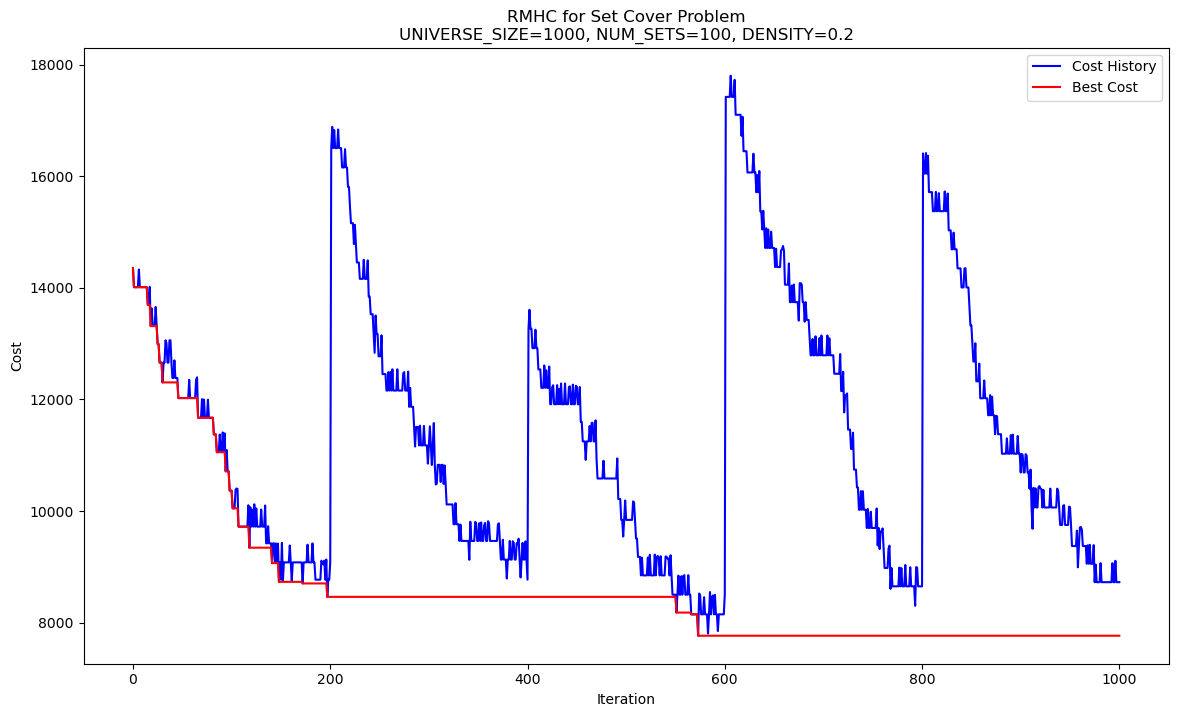


Running RMHC for configuration: {'universe_size': 10000, 'num_sets': 1000, 'density': 0.2}


100%|█████████████████████████████████████| 1000/1000 [00:00<00:00, 1415.06it/s]


Best Cost: 1871125.6858199975
Index of Best Cost in History: 395


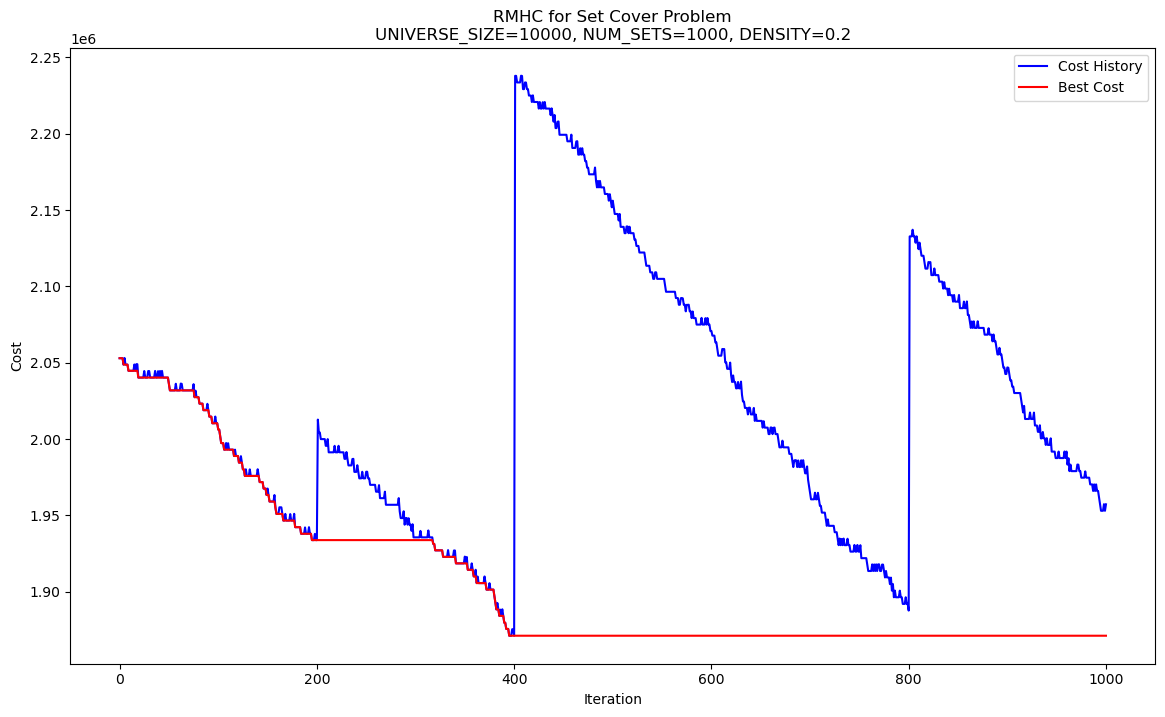


Running RMHC for configuration: {'universe_size': 100000, 'num_sets': 10000, 'density': 0.1}


100%|███████████████████████████████████████| 1000/1000 [01:53<00:00,  8.80it/s]


Best Cost: 124129032.31222004
Index of Best Cost in History: 799


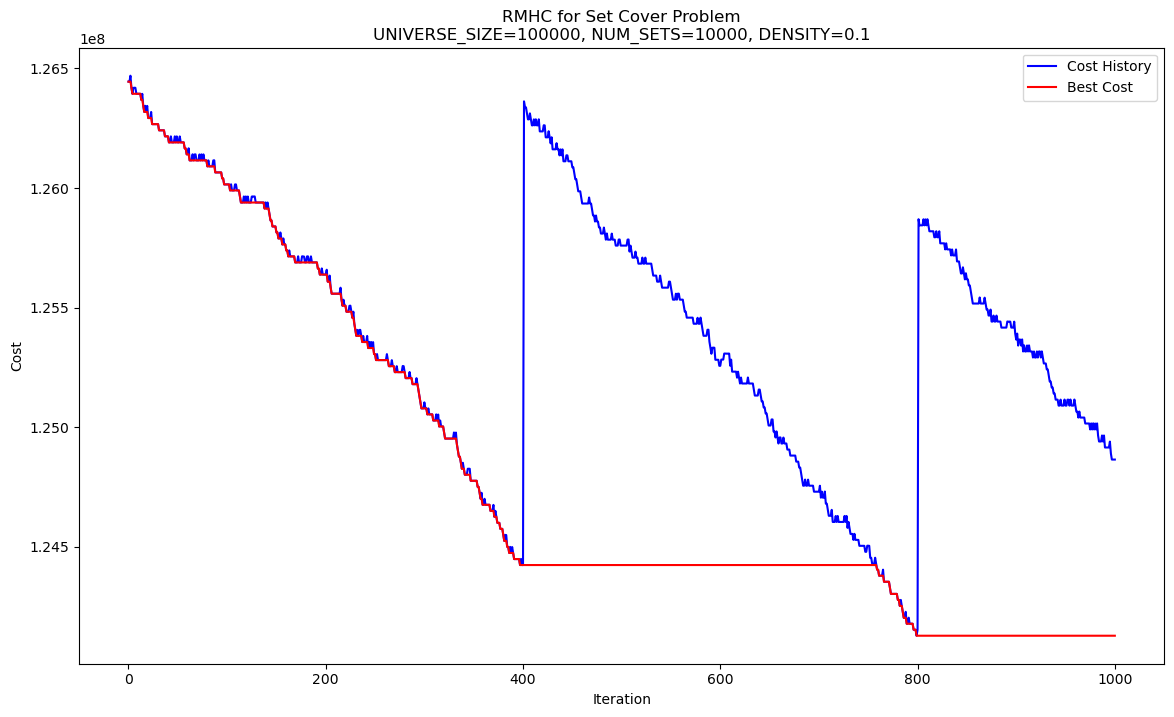


Running RMHC for configuration: {'universe_size': 100000, 'num_sets': 10000, 'density': 0.2}


100%|███████████████████████████████████████| 1000/1000 [01:49<00:00,  9.15it/s]


Best Cost: 263774311.20401293
Index of Best Cost in History: 389


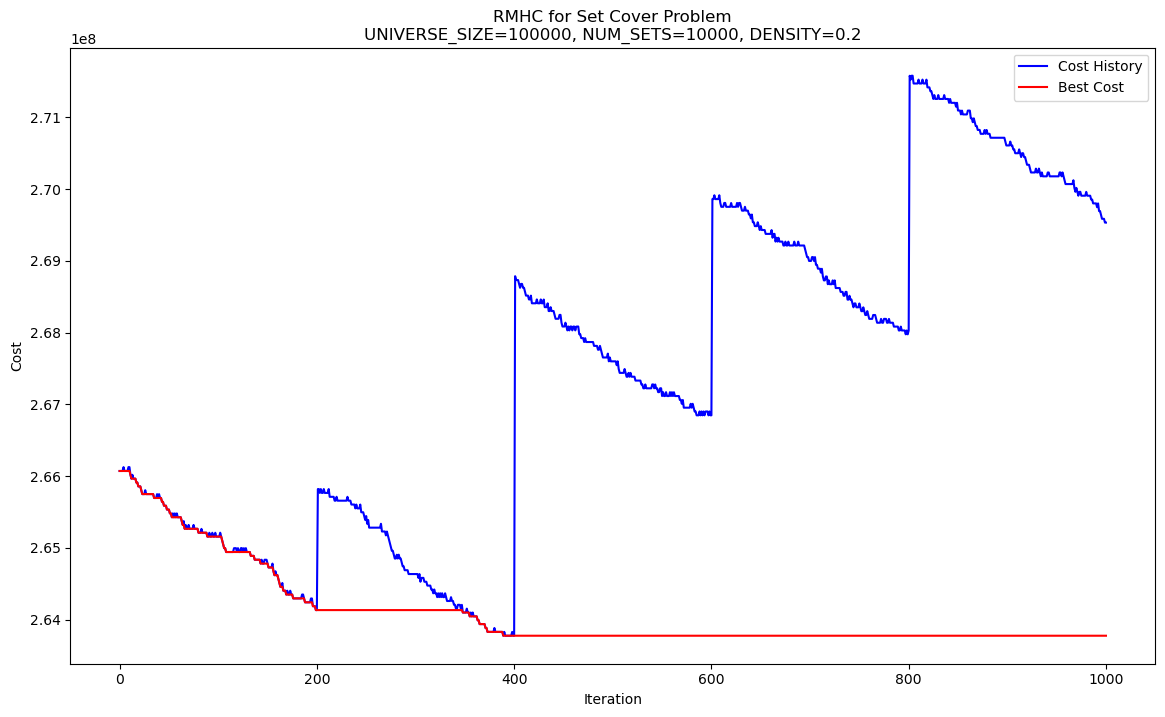


Running RMHC for configuration: {'universe_size': 100000, 'num_sets': 10000, 'density': 0.3}


100%|███████████████████████████████████████| 1000/1000 [01:45<00:00,  9.52it/s]


Best Cost: 415827195.3991803
Index of Best Cost in History: 600


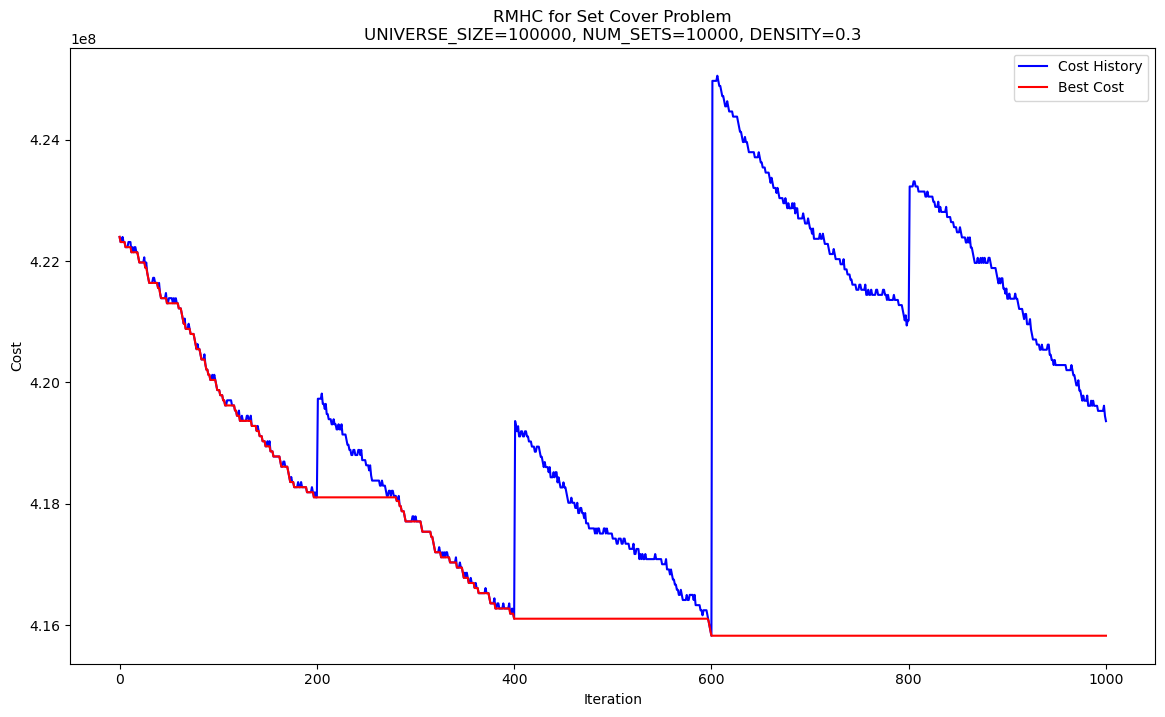

In [9]:
# =============================================
# Run RMHC for different configurations
# =============================================
configurations = [
    {"universe_size": 100, "num_sets": 10, "density": 0.2},
    {"universe_size": 1_000, "num_sets": 100, "density": 0.2},
    {"universe_size": 10_000, "num_sets": 1_000, "density": 0.2},
    {"universe_size": 100_000, "num_sets": 10_000, "density": 0.1},
    {"universe_size": 100_000, "num_sets": 10_000, "density": 0.2},
    {"universe_size": 100_000, "num_sets": 10_000, "density": 0.3},
]

for config in configurations:
    print(f"\nRunning RMHC for configuration: {config}")
    rmhc(**config)
